# Task
Analyze the data from Google Drive by loading it into the notebook, performing cleaning and preprocessing, conducting correlation analysis, segmenting the data for drill-down analysis, and finally developing and evaluating a predictive machine learning model.

## Mount Google Drive and Load Data

### Subtask:
Mount Google Drive to access the provided data folder and load the relevant dataset into the notebook.


**Reasoning**:
The first instruction is to mount Google Drive. This command will prompt the user for authorization to mount Google Drive to the Colab environment.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive Mounted Successfully")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive Mounted Successfully


**Reasoning**:
Now that Google Drive is mounted, I need to list the contents of the mounted drive to identify the dataset file. I will start by listing the contents of the root of 'My Drive'.



In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/tubes_anbis/'))

['Keratonian_anomalies_marked(CLEAN) (1)(Keratonian_anomalies_marked(CLE).csv', 'Keratonian_Alternative_Models.py', '.ipynb_checkpoints', 'Pemodelan_Analisis Bisnis_Keratonian.ipynb']


**Reasoning**:
From the list of files in Google Drive, 'Data APT NEW - Update.csv' appears to be a suitable dataset for analysis. I will now load this CSV file into a pandas DataFrame.



In [ ]:
# Load CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tubes_anbis/Keratonian_anomalies_marked(CLEAN) (1)(Keratonian_anomalies_marked(CLE).csv',
                  sep=';',
                  parse_dates=['Tanggal Order'],
                  dayfirst=False)

# Informasi Dasar
print("=" * 80)
print("📌 INFORMASI DATASET KERATONIAN")
print("=" * 80)
print(f"Total Records: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print(f"Date Range: {df['Tanggal Order'].min()} to {df['Tanggal Order'].max()}")
print(f"Total Revenue: Rp {df['Total Penjualan'].sum():,.0f}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nData Types:\n{df.dtypes}")

# Display Sample Data
print("\n" + "=" * 80)
print("📋 SAMPLE DATA (5 rows pertama)")
print("=" * 80)
print(df.head())

# Statistik Deskriptif
print("\n" + "=" * 80)
print("📊 STATISTIK DESKRIPTIF")
print("=" * 80)
print(df.describe())

📌 INFORMASI DATASET KERATONIAN
Total Records: 12,804
Total Columns: 14
Date Range: 2023-01-01 00:00:00 to 2025-03-31 00:00:00
Total Revenue: Rp 572,453,517

Missing Values:
Tanggal Order           0
Channel                 0
Kategori Channel        0
Cust                    0
Daerah                  0
Provinsi                0
Pesanan                 0
Kategori                0
Qty                     0
Harga Jual              0
Harga setelah diskon    0
Total Diskon            0
Total Penjualan         0
Total                   0
dtype: int64

Data Types:
Tanggal Order           datetime64[ns]
Channel                         object
Kategori Channel                object
Cust                            object
Daerah                          object
Provinsi                        object
Pesanan                         object
Kategori                        object
Qty                              int64
Harga Jual                       int64
Harga setelah diskon             int64
Total Di

## 4.1 Analisis Diagnostik

1. Untuk analisis korelasi (mengidentifikasi hubungan sebab-akibat antar variabel): menunjukkan matriks korelasi antar variabel numerik dan secara spesifik mencetak variabel-variabel dengan korelasi tertinggi (positif dan negatif) dengan 'Total Penjualan'. Ini secara langsung menjawab kebutuhan untuk mengidentifikasi hubungan antar variabel.

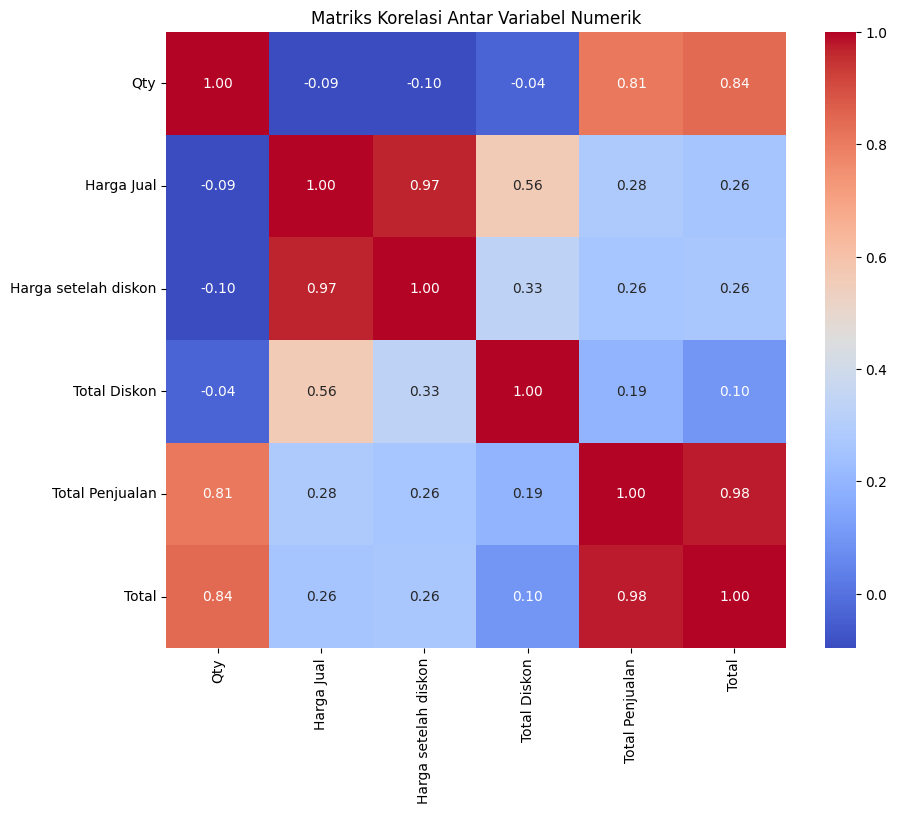


Variabel-variabel dengan korelasi tertinggi (positif dan negatif) dengan 'Total Penjualan':
Total Penjualan         1.000000
Total                   0.977517
Qty                     0.807632
Harga Jual              0.281993
Harga setelah diskon    0.263110
Total Diskon            0.190587
Name: Total Penjualan, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik untuk analisis korelasi
# Asumsikan kolom 'Qty', 'Harga Jual', 'Harga setelah diskon', 'Total Diskon', 'Total Penjualan', 'Total' adalah numerik dan relevan.
# Jika ada kolom numerik lain yang relevan, bisa ditambahkan.

# Memastikan hanya kolom numerik yang dipilih
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()

print("\nVariabel-variabel dengan korelasi tertinggi (positif dan negatif) dengan 'Total Penjualan':")
print(correlation_matrix['Total Penjualan'].sort_values(ascending=False))

### Segmentasi Data (Drill-down Analysis)

Selanjutnya, kita akan melakukan segmentasi data untuk analisis yang lebih mendalam. Kita bisa melakukan segmentasi berdasarkan kategori `Channel`, `Kategori Channel`, `Daerah`, atau `Provinsi` untuk melihat pola penjualan di setiap segmen.


Segmentasi berdasarkan Channel:
             Channel  Total_Penjualan_Sum  Jumlah_Pesanan
5             Shopee            432662503            9850
9          Tokopedia             45596300            1295
7             Tiktok             41175500             428
3            Offline             24570000              76
6    Shopee Surabaya             12074000             476
1            Komship              8028000             348
4             Sample              5051600             193
2             Lazada              3023614             127
8  Tiktok Keratonian               233000               8
0         Kiriminaja                39000               3


/tmp/ipython-input-273824849.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Total_Penjualan_Sum', data=channel_segment, palette='viridis')


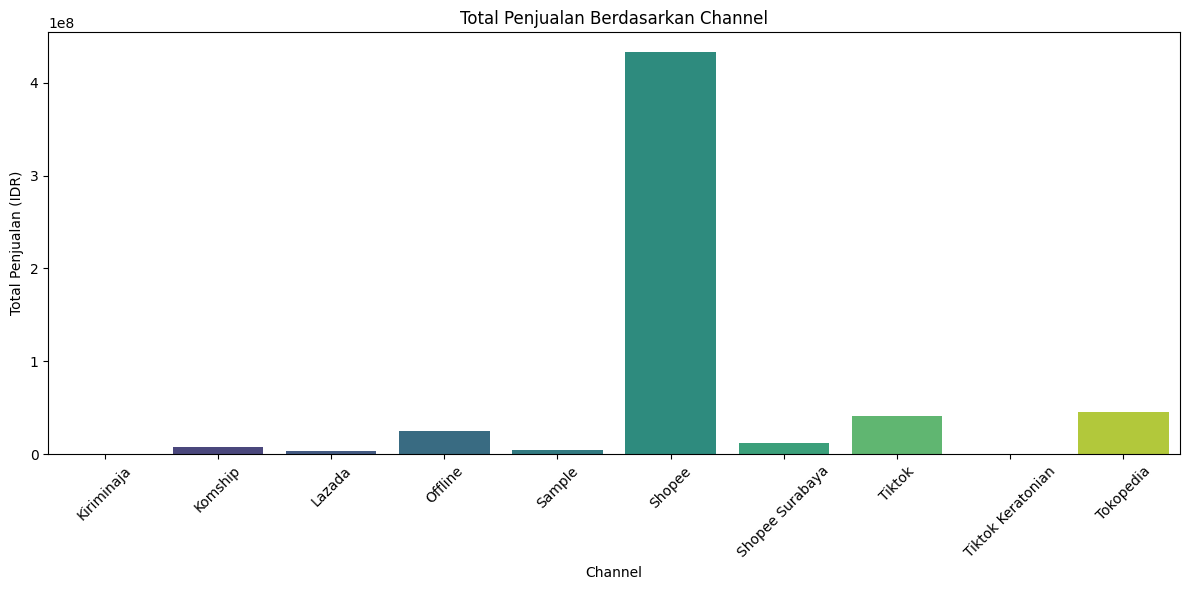


Segmentasi berdasarkan Kategori Channel:
  Kategori Channel  Total_Penjualan_Sum  Jumlah_Pesanan
0         End User            518159417           11832
1         Reseller             49242500             779
2           Sample              5051600             193


/tmp/ipython-input-273824849.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kategori Channel', y='Total_Penjualan_Sum', data=kategori_channel_segment, palette='plasma')


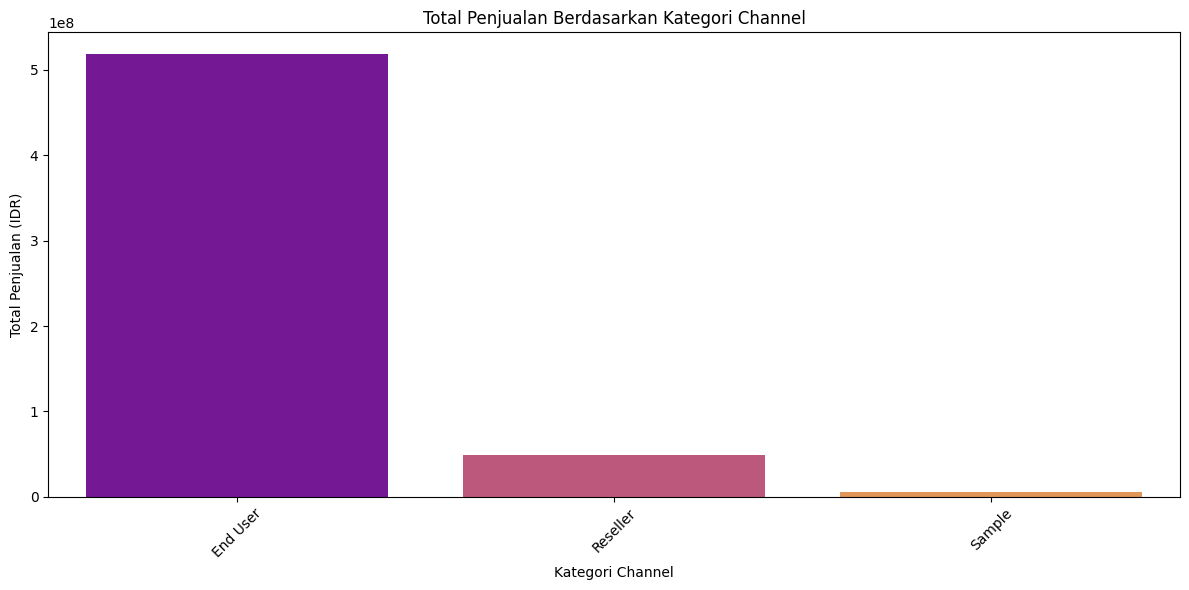


Segmentasi berdasarkan Provinsi:
              Provinsi  Total_Penjualan_Sum  Jumlah_Pesanan
10          JAWA TIMUR            180679161            3881
5          DKI JAKARTA             97468319            1884
8           JAWA BARAT             89679795            2049
9          JAWA TENGAH             44039390            1218
2               BANTEN             33072419             876
0                 BALI             26173582             572
4       D.I YOGYAKARTA             17423863             488
13  KALIMANTAN SELATAN             13357190             253
15    KALIMANTAN TIMUR             10668780             238
29    SULAWESI SELATAN              7291500             198


/tmp/ipython-input-273824849.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provinsi', y='Total_Penjualan_Sum', data=provinsi_segment.nlargest(10, 'Total_Penjualan_Sum'), palette='magma')


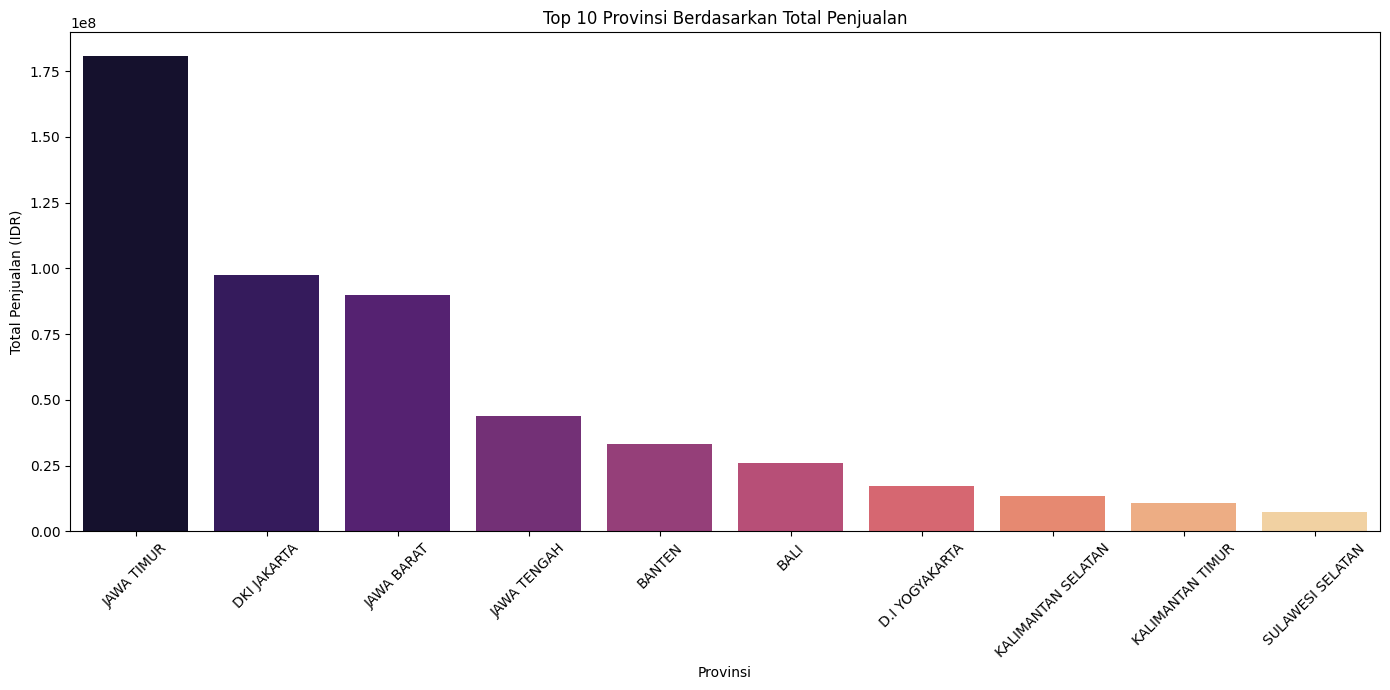

In [ ]:
# Segmentasi berdasarkan 'Channel'
channel_segment = df.groupby('Channel').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()
print("\nSegmentasi berdasarkan Channel:")
print(channel_segment.sort_values(by='Total_Penjualan_Sum', ascending=False))

# Visualisasi Segmentasi Channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Total_Penjualan_Sum', data=channel_segment, palette='viridis')
plt.title('Total Penjualan Berdasarkan Channel')
plt.xlabel('Channel')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Segmentasi berdasarkan 'Kategori Channel'
kategori_channel_segment = df.groupby('Kategori Channel').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()
print("\nSegmentasi berdasarkan Kategori Channel:")
print(kategori_channel_segment.sort_values(by='Total_Penjualan_Sum', ascending=False))

# Visualisasi Segmentasi Kategori Channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Kategori Channel', y='Total_Penjualan_Sum', data=kategori_channel_segment, palette='plasma')
plt.title('Total Penjualan Berdasarkan Kategori Channel')
plt.xlabel('Kategori Channel')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Segmentasi berdasarkan 'Provinsi'
provinsi_segment = df.groupby('Provinsi').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()
print("\nSegmentasi berdasarkan Provinsi:")
print(provinsi_segment.sort_values(by='Total_Penjualan_Sum', ascending=False).head(10))

# Visualisasi Segmentasi Provinsi (Top 10)
plt.figure(figsize=(14, 7))
sns.barplot(x='Provinsi', y='Total_Penjualan_Sum', data=provinsi_segment.nlargest(10, 'Total_Penjualan_Sum'), palette='magma')
plt.title('Top 10 Provinsi Berdasarkan Total Penjualan')
plt.xlabel('Provinsi')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Labeling Data untuk Klaster

In [ ]:
# Buat kolom 'Cluster' berdasarkan 'Kategori Channel'
# Asumsi: Cluster 1 = End User, Cluster 2 = Reseller, Cluster 0 = Sample atau lainnya
def assign_cluster(kategori):
    if kategori == 'End User':
        return 1
    elif kategori == 'Reseller':
        return 2
    else:
        return 0  # Untuk 'Sample' atau kategori lain yang mungkin ada

df['Cluster'] = df['Kategori Channel'].apply(assign_cluster)

print("Data setelah penambahan kolom 'Cluster':")
print(df[['Kategori Channel', 'Cluster']].head())
print("\nDistribusi nilai dalam kolom 'Cluster':")
print(df['Cluster'].value_counts())

# Tampilkan beberapa baris data dengan kolom 'Cluster' baru
print("\nSample data dengan kolom 'Cluster' baru:")
print(df.head())

Data setelah penambahan kolom 'Cluster':
  Kategori Channel  Cluster
0         End User        1
1         End User        1
2         End User        1
3         Reseller        2
4         Reseller        2

Distribusi nilai dalam kolom 'Cluster':
Cluster
1    11832
2      779
0      193
Name: count, dtype: int64

Sample data dengan kolom 'Cluster' baru:
  Tanggal Order Channel Kategori Channel          Cust      Daerah  \
0    2023-01-01  Shopee         End User       emada20  BANYUWANGI   
1    2023-01-01  Shopee         End User       emada20  BANYUWANGI   
2    2023-01-01  Shopee         End User  midhaasyafii      KEDIRI   
3    2023-01-06  Tiktok         Reseller          Zaky    SURABAYA   
4    2023-01-06  Tiktok         Reseller          Zaky    SURABAYA   

     Provinsi          Pesanan   Kategori  Qty  Harga Jual  \
0  JAWA TIMUR       Dks Gaharu  Dupa Stik    1       16000   
1  JAWA TIMUR       Dks Melati  Dupa Stik    2       18000   
2  JAWA TIMUR  Dks Blue Flower  Du

# Task
Perform a drill-down comparative analysis of 'End User' and 'Reseller' segments using the `df` DataFrame, aggregating and visualizing their total sales and order counts by 'Channel' and 'Provinsi', and then compare the key findings from both segments.

## Filter and Analyze End User Data

### Subtask:
Filter the main DataFrame to create a sub-dataframe containing only 'End User' data. Then, perform aggregations (e.g., total sales, order counts) based on relevant dimensions like 'Channel' or 'Provinsi' for the 'End User' segment.


**Reasoning**:
The subtask requires filtering the main DataFrame for 'End User' data and then performing aggregations on this filtered data based on 'Channel' and 'Provinsi'. This code block will accomplish all these steps as per the instructions.



In [ ]:
import pandas as pd

# 1. Filter the df DataFrame to create a new DataFrame named df_end_user
df_end_user = df[df['Kategori Channel'] == 'End User'].copy()

print(f"DataFrame `df_end_user` created with {len(df_end_user)} records.")

# 2. Group df_end_user by 'Channel' and calculate aggregations
end_user_channel_segment = df_end_user.groupby('Channel').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 3. Group df_end_user by 'Provinsi' and calculate aggregations
end_user_provinsi_segment = df_end_user.groupby('Provinsi').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 4. Print the end_user_channel_segment DataFrame, sorted
print("\nSegmentasi End User Berdasarkan Channel:")
print(end_user_channel_segment.sort_values(by='Total_Penjualan_Sum', ascending=False))

# 5. Print the end_user_provinsi_segment DataFrame, sorted (top 10)
print("\nTop 10 Segmentasi End User Berdasarkan Provinsi:")
print(end_user_provinsi_segment.sort_values(by='Total_Penjualan_Sum', ascending=False).head(10))

DataFrame `df_end_user` created with 11832 records.

Segmentasi End User Berdasarkan Channel:
             Channel  Total_Penjualan_Sum  Jumlah_Pesanan
2             Shopee            432662503            9850
5          Tokopedia             45596300            1295
1            Offline             24570000              76
3    Shopee Surabaya             12074000             476
0             Lazada              3023614             127
4  Tiktok Keratonian               233000               8

Top 10 Segmentasi End User Berdasarkan Provinsi:
              Provinsi  Total_Penjualan_Sum  Jumlah_Pesanan
10          JAWA TIMUR            140154161            3481
5          DKI JAKARTA             94808919            1779
8           JAWA BARAT             87000195            1940
9          JAWA TENGAH             42198390            1128
2               BANTEN             30243819             770
0                 BALI             24927882             508
4       D.I YOGYAKARTA        

# **Visualize End User Analysis**

### Subtask:
Create visualizations (e.g., bar plots) to display the aggregated insights for the 'End User' segment, such as total sales by channel or top provinces.


**Reasoning**:
The subtask requires visualizing the 'End User' segment data using bar plots. I will generate code to create the first bar plot showing total sales by channel for end-users, using the `end_user_channel_segment` DataFrame as instructed.



/tmp/ipython-input-805295628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Total_Penjualan_Sum', data=end_user_channel_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), palette='viridis')


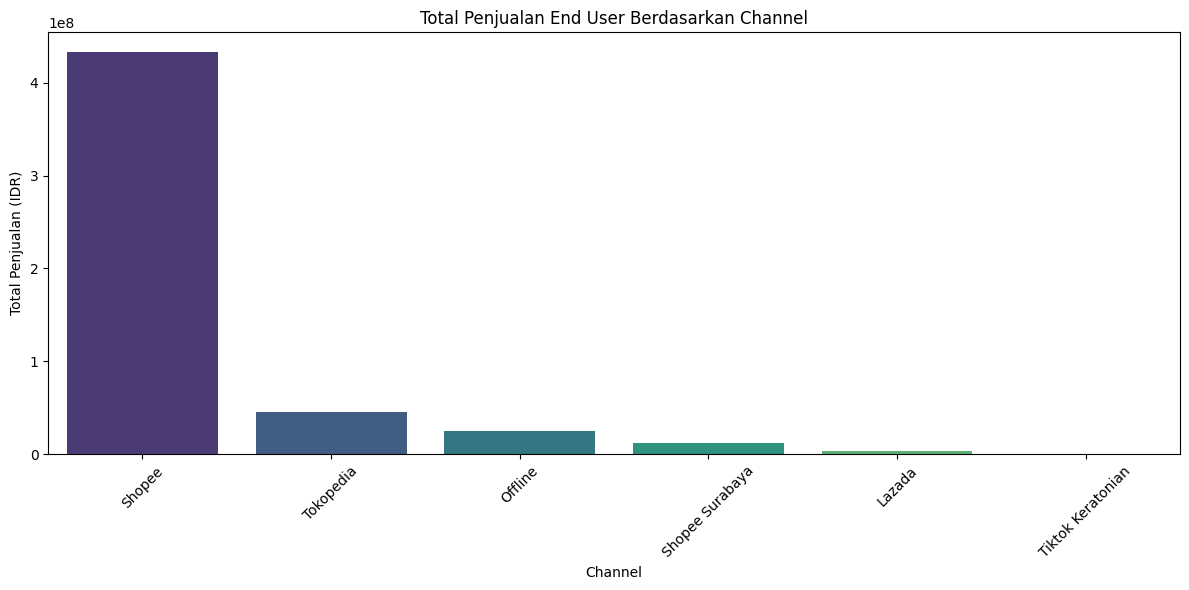

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Segmentasi End User Channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Total_Penjualan_Sum', data=end_user_channel_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), palette='viridis')
plt.title('Total Penjualan End User Berdasarkan Channel')
plt.xlabel('Channel')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code produced a `FutureWarning` regarding the `palette` argument in `seaborn.barplot` and only completed part of the visualization subtask. I will modify the existing cell to fix the warning by explicitly assigning the `x` variable to `hue` and setting `legend=False`, and then add the visualization for the top 10 provinces for the 'End User' segment as per the subtask instructions.



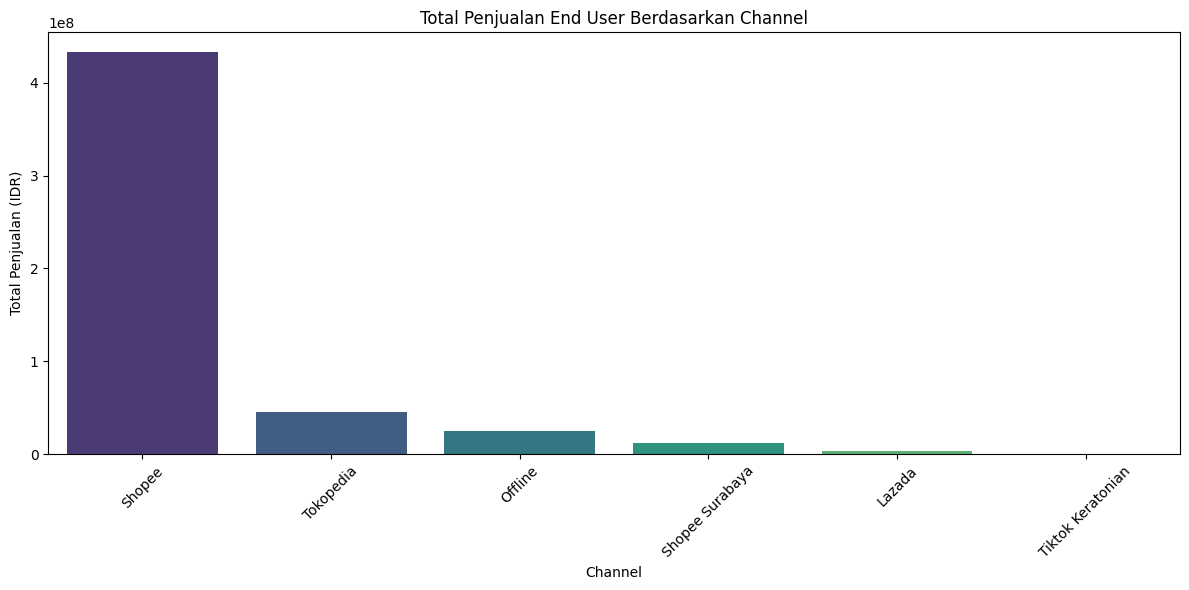

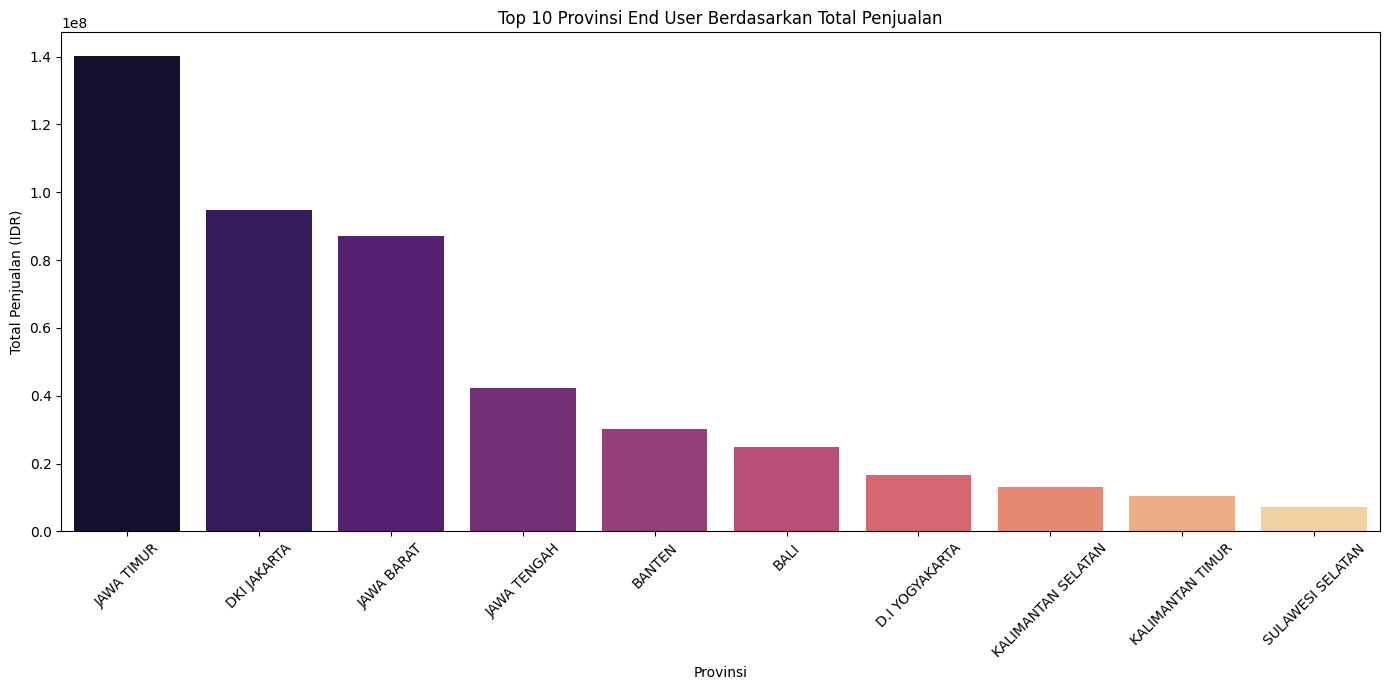

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Segmentasi End User Channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Total_Penjualan_Sum', data=end_user_channel_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), hue='Channel', palette='viridis', legend=False)
plt.title('Total Penjualan End User Berdasarkan Channel')
plt.xlabel('Channel')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Segmentasi End User Provinsi (Top 10)
plt.figure(figsize=(14, 7))
top_10_end_user_provinsi = end_user_provinsi_segment.sort_values(by='Total_Penjualan_Sum', ascending=False).head(10)
sns.barplot(x='Provinsi', y='Total_Penjualan_Sum', data=top_10_end_user_provinsi, hue='Provinsi', palette='magma', legend=False)
plt.title('Top 10 Provinsi End User Berdasarkan Total Penjualan')
plt.xlabel('Provinsi')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Visualisasi Segmentasi Reseller**

## Filter and Analyze Reseller Data

### Subtask:
Filter the main DataFrame to create a sub-dataframe containing only 'Reseller' data. Then, perform similar aggregations (e.g., total sales, order counts) based on relevant dimensions like 'Channel' or 'Provinsi' for the 'Reseller' segment.


**Reasoning**:
The subtask requires filtering the main DataFrame for 'Reseller' data and then performing aggregations on this filtered data based on 'Channel' and 'Provinsi'. This code block will accomplish all these steps as per the instructions.



In [ ]:
import pandas as pd

# 1. Filter the df DataFrame to create a new DataFrame named df_reseller
df_reseller = df[df['Kategori Channel'] == 'Reseller'].copy()

print(f"DataFrame `df_reseller` created with {len(df_reseller)} records.")

# 2. Group df_reseller by 'Channel' and calculate aggregations
reseller_channel_segment = df_reseller.groupby('Channel').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 3. Group df_reseller by 'Provinsi' and calculate aggregations
reseller_provinsi_segment = df_reseller.groupby('Provinsi').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 4. Print the reseller_channel_segment DataFrame, sorted
print("\nSegmentasi Reseller Berdasarkan Channel:")
print(reseller_channel_segment.sort_values(by='Total_Penjualan_Sum', ascending=False))

# 5. Print the top 10 rows of the reseller_provinsi_segment DataFrame, sorted
print("\nTop 10 Segmentasi Reseller Berdasarkan Provinsi:")
print(reseller_provinsi_segment.sort_values(by='Total_Penjualan_Sum', ascending=False).head(10))

DataFrame `df_reseller` created with 779 records.

Segmentasi Reseller Berdasarkan Channel:
      Channel  Total_Penjualan_Sum  Jumlah_Pesanan
2      Tiktok             41175500             428
1     Komship              8028000             348
0  Kiriminaja                39000               3

Top 10 Segmentasi Reseller Berdasarkan Provinsi:
            Provinsi  Total_Penjualan_Sum  Jumlah_Pesanan
6         JAWA TIMUR             39444800             352
1             BANTEN              2591000              98
4         JAWA BARAT              2015900              89
3        DKI JAKARTA              1738700              72
5        JAWA TENGAH              1573700              76
0               BALI               919000              50
2     D.I YOGYAKARTA               519000              23
9   KALIMANTAN TIMUR                82000               3
14  SULAWESI SELATAN                65700               3
10    KEPULAUAN RIAU                65700               2


**Reasoning**:
The next step is to visualize the aggregated data for the 'Reseller' segment, similar to how the 'End User' segment was visualized. I will create bar plots for total sales by channel and by the top 10 provinces for resellers.



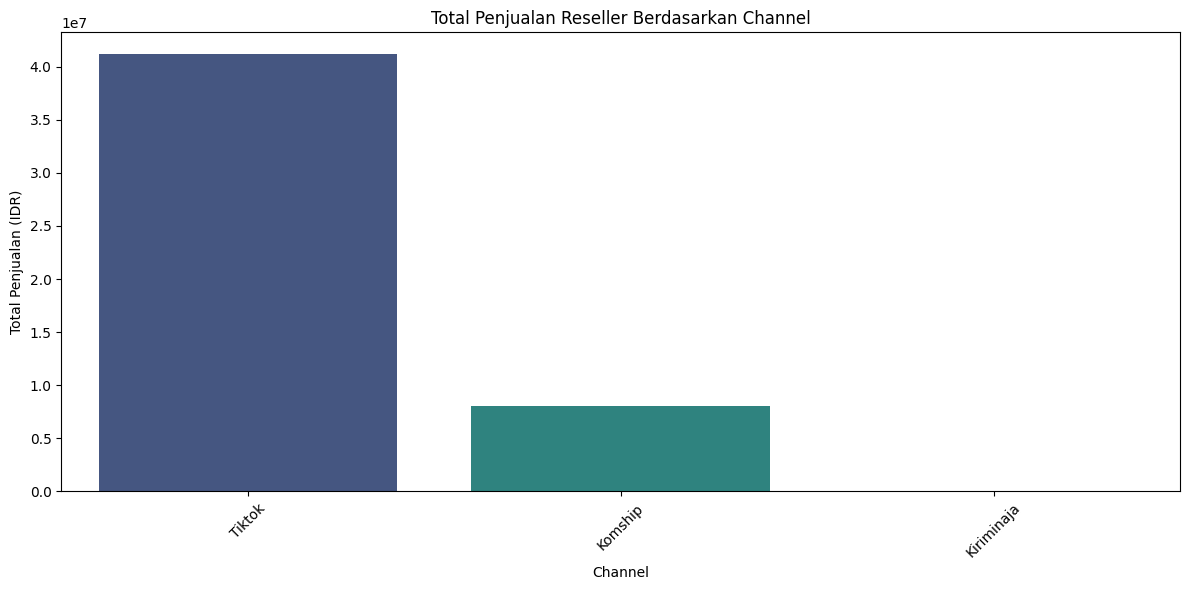

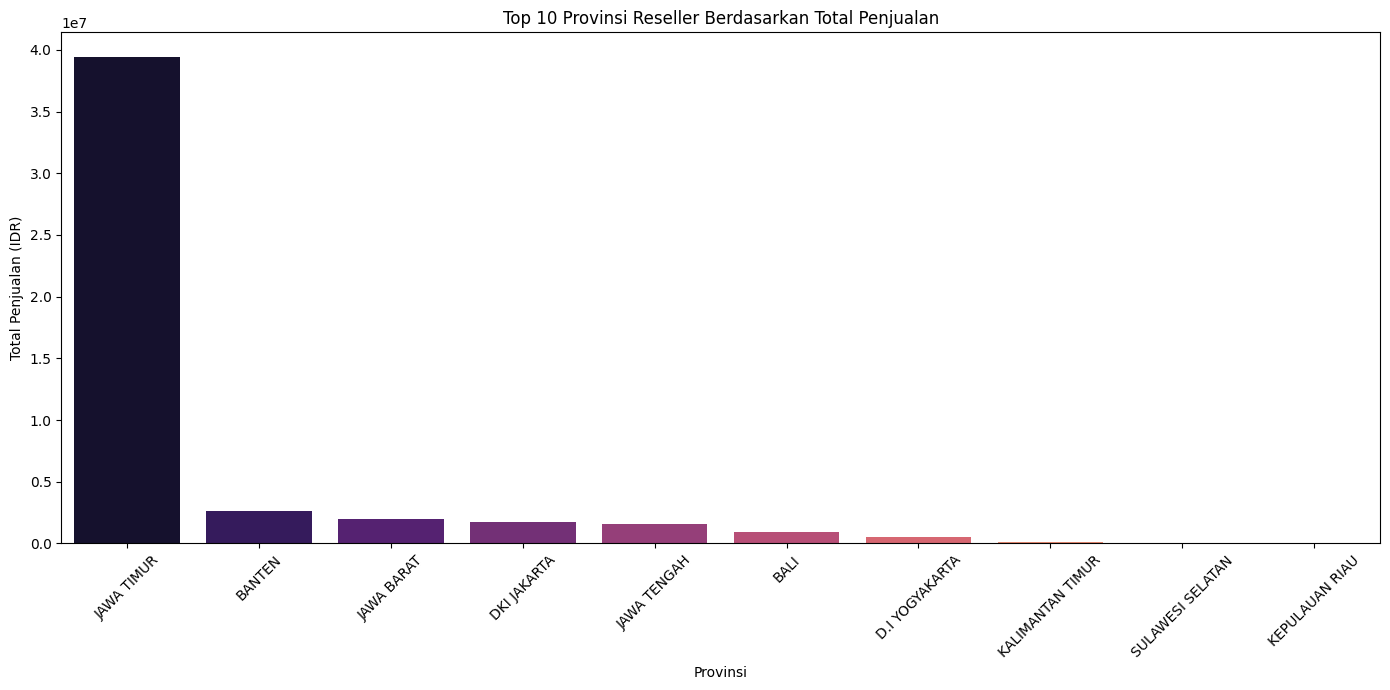

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Segmentasi Reseller Channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Total_Penjualan_Sum', data=reseller_channel_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), hue='Channel', palette='viridis', legend=False)
plt.title('Total Penjualan Reseller Berdasarkan Channel')
plt.xlabel('Channel')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Segmentasi Reseller Provinsi (Top 10)
plt.figure(figsize=(14, 7))
top_10_reseller_provinsi = reseller_provinsi_segment.sort_values(by='Total_Penjualan_Sum', ascending=False).head(10)
sns.barplot(x='Provinsi', y='Total_Penjualan_Sum', data=top_10_reseller_provinsi, hue='Provinsi', palette='magma', legend=False)
plt.title('Top 10 Provinsi Reseller Berdasarkan Total Penjualan')
plt.xlabel('Provinsi')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Compare End User and Reseller Segments

### Subtask:
Provide a summary or comparative visualizations of the key findings from both 'End User' and 'Reseller' analyses to highlight differences and similarities.


## Summary:

### Data Analysis Key Findings

*   **End User Segment - Sales by Channel**: 'Shopee' is the dominant channel for End Users, accounting for \$432,662,503 in total sales and 9,850 orders. 'Tokopedia' follows with \$45,596,300 in sales from 1,295 orders.
*   **End User Segment - Sales by Province**: 'JAWA TIMUR' leads in End User sales with \$140,154,161 from 3,481 orders. 'DKI JAKARTA' and 'JAWA BARAT' are also significant with sales of \$94,808,919 and \$87,000,195, respectively.
*   **Reseller Segment - Sales by Channel**: 'Tiktok' is the primary channel for Resellers, generating \$41,175,500 in total sales from 428 orders. 'Komship' is the second largest channel with \$8,028,000 in sales from 348 orders.
*   **Reseller Segment - Sales by Province**: 'JAWA TIMUR' also leads in Reseller sales, generating \$39,444,800 from 352 orders. 'BANTEN' and 'JAWA BARAT' follow with \$2,591,000 (98 orders) and \$2,015,900 (89 orders), respectively.
*   **Sales Volume Comparison**: The 'End User' segment demonstrates significantly higher sales volumes (\$478,258,803 total sales across all channels) compared to the 'Reseller' segment (\$49,242,500 total sales across all channels).
*   **Channel Dominance Differences**: While 'Shopee' is overwhelmingly dominant for End Users, 'Tiktok' holds the top spot for Resellers, indicating distinct platform preferences between the two customer segments.
*   **Geographic Overlap**: 'JAWA TIMUR' consistently emerges as the top-performing province for both End User and Reseller segments, suggesting it is a strategically important region overall.

### Insights or Next Steps

*   **Tailored Channel Strategies**: Develop distinct marketing and sales strategies for each segment, leveraging 'Shopee' for End Users and 'Tiktok' for Resellers, considering their platform preferences and purchasing behaviors.
*   **Deep Dive into Jawa Timur**: Investigate the factors contributing to 'JAWA TIMUR' being the leading province for both segments to replicate success in other regions or further optimize engagement in this high-performing area.


# Task
Analyze and visualize the 'End User' prime time by extracting the 'Day' from the 'Tanggal Order' column in the `df_end_user` DataFrame, and then aggregating total sales and order counts by 'Day'.

## Analyze End User Prime Time by Day

### Subtask:
Perform aggregations on the 'End User' DataFrame based on the 'Day' to identify peak sales times within a day for this segment.


**Reasoning**:
The subtask requires extracting the 'Day' from the 'Tanggal Order' column in the `df_end_user` DataFrame and then aggregating sales and order counts by this 'Day'. This code block will perform all these steps as instructed.



In [ ]:
import pandas as pd

# 1. Extract 'Day' from 'Tanggal Order' in df_end_user
df_end_user['Day'] = df_end_user['Tanggal Order'].dt.day

# 2. Group df_end_user by 'Day' and calculate aggregations
end_user_day_segment = df_end_user.groupby('Day').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 3. Print the end_user_day_segment DataFrame, sorted
print("\nSegmentasi End User Berdasarkan Hari:")
print(end_user_day_segment.sort_values(by='Total_Penjualan_Sum', ascending=False).head(10))


Segmentasi End User Berdasarkan Hari:
    Day  Total_Penjualan_Sum  Jumlah_Pesanan
4     5             37653007             444
24   25             22405676             543
2     3             20924780             465
8     9             18899022             378
17   18             18457132             436
28   29             18401694             378
7     8             17774982             430
11   12             17621924             460
0     1             17461818             399
20   21             17439226             339


**Reasoning**:
The previous step successfully aggregated 'End User' sales and order counts by day. Now, I need to visualize this segmented data to clearly identify peak sales days, which is part of the overall subtask of analyzing 'End User' prime time.



## Visualize End User Prime Time by Day

### Subtask:
Create visualizations (e.g., bar plots) to display the 'End User' total sales and order counts by 'Day'.


**Reasoning**:
The previous step successfully aggregated 'End User' sales and order counts by day. Now, I need to visualize this segmented data using two bar plots: one for total sales by day and another for order counts by day, to clearly identify peak sales days as per the subtask instructions.



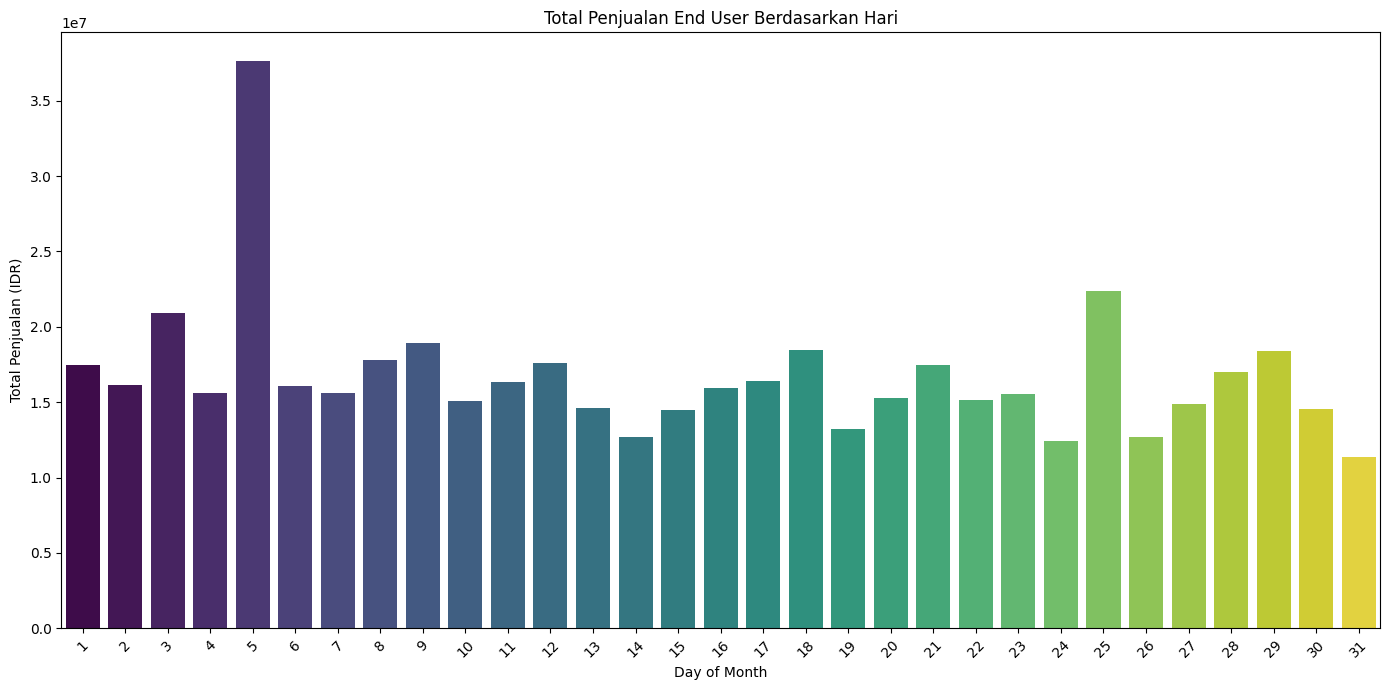

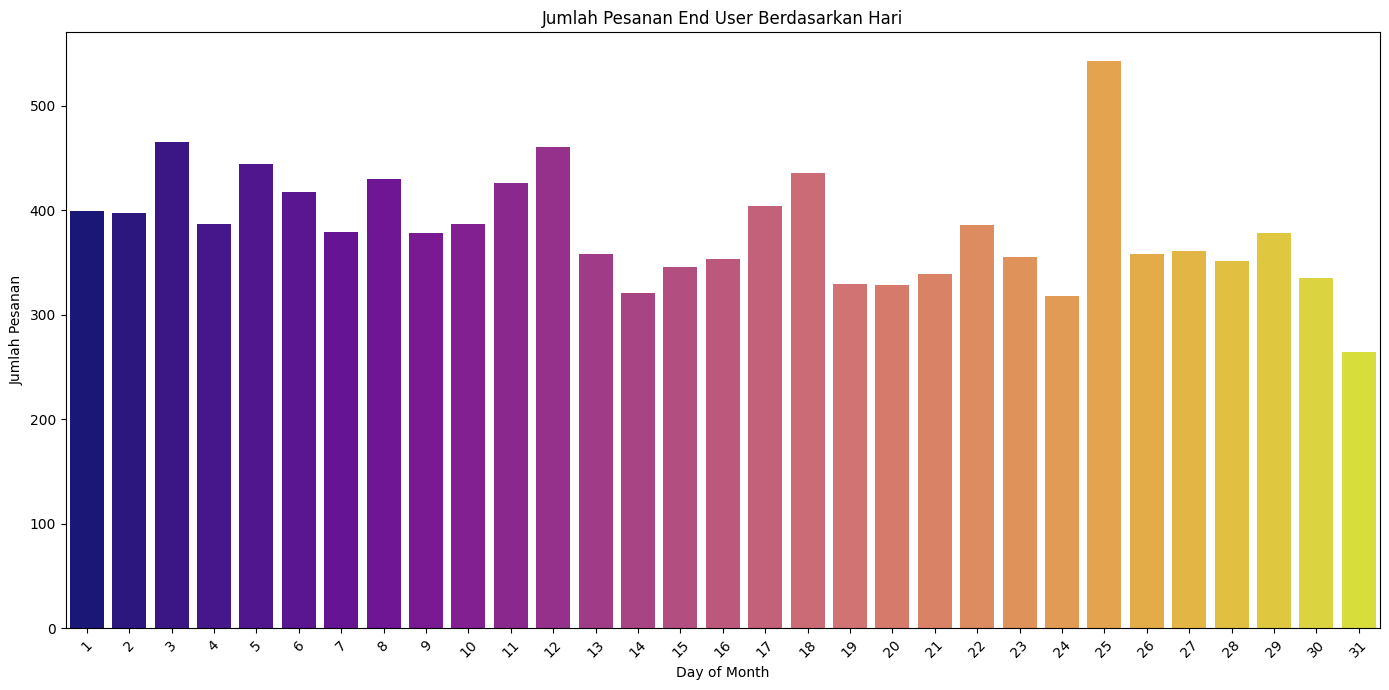

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Total Penjualan End User Berdasarkan Hari
plt.figure(figsize=(14, 7))
sns.barplot(x='Day', y='Total_Penjualan_Sum', data=end_user_day_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), palette='viridis', hue='Day', legend=False)
plt.title('Total Penjualan End User Berdasarkan Hari')
plt.xlabel('Day of Month')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Jumlah Pesanan End User Berdasarkan Hari
plt.figure(figsize=(14, 7))
sns.barplot(x='Day', y='Jumlah_Pesanan', data=end_user_day_segment.sort_values(by='Jumlah_Pesanan', ascending=False), palette='plasma', hue='Day', legend=False)
plt.title('Jumlah Pesanan End User Berdasarkan Hari')
plt.xlabel('Day of Month')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze End User Prime Time by Year

### Subtask:
Perform aggregations on the 'End User' DataFrame based on the 'Year' to identify sales trends across years for this segment.


**Reasoning**:
The subtask requires extracting the 'Year' from the 'Tanggal Order' column in the `df_end_user` DataFrame and then aggregating sales and order counts by this 'Year'. This code block will perform all these steps as instructed.



In [ ]:
import pandas as pd

# 1. Extract 'Year' from 'Tanggal Order' in df_end_user
df_end_user['Year'] = df_end_user['Tanggal Order'].dt.year

# 2. Group df_end_user by 'Year' and calculate aggregations
end_user_year_segment = df_end_user.groupby('Year').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 3. Print the end_user_year_segment DataFrame, sorted
print("\nSegmentasi End User Berdasarkan Tahun:")
print(end_user_year_segment.sort_values(by='Total_Penjualan_Sum', ascending=False))


Segmentasi End User Berdasarkan Tahun:
   Year  Total_Penjualan_Sum  Jumlah_Pesanan
1  2024            397965144            8669
2  2025             74729000            1620
0  2023             45465273            1543


## Visualize End User Prime Time by Year

### Subtask:
Create visualizations (e.g., bar plots) to display the 'End User' total sales and order counts by 'Year'.

**Reasoning**:
The previous step successfully aggregated 'End User' sales and order counts by year. Now, I need to visualize this segmented data using two bar plots: one for total sales by year and another for order counts by year, to clearly identify sales trends across years as per the subtask instructions.



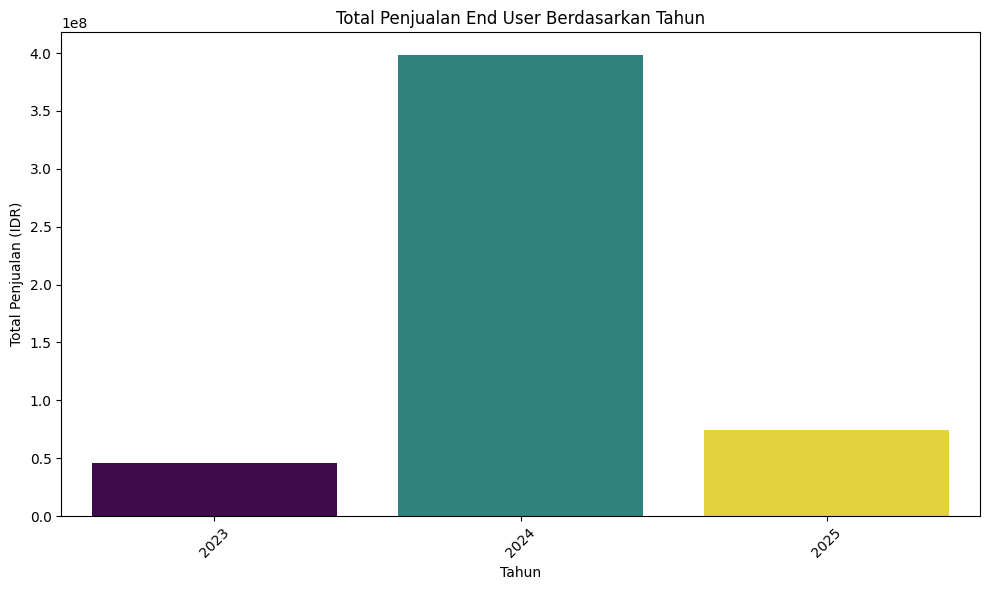

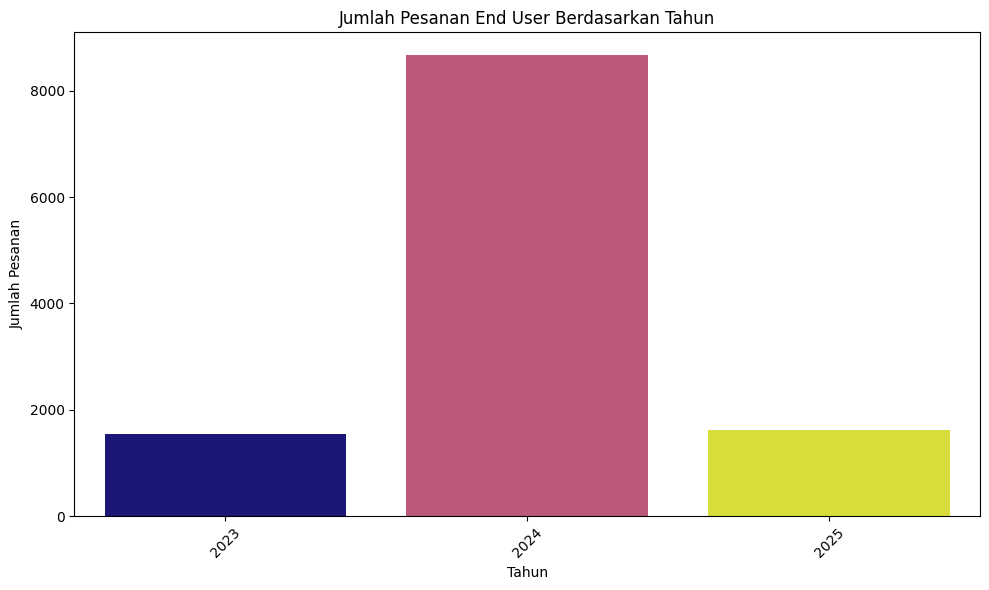

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Total Penjualan End User Berdasarkan Tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total_Penjualan_Sum', data=end_user_year_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), palette='viridis', hue='Year', legend=False)
plt.title('Total Penjualan End User Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Jumlah Pesanan End User Berdasarkan Tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Jumlah_Pesanan', data=end_user_year_segment.sort_values(by='Jumlah_Pesanan', ascending=False), palette='plasma', hue='Year', legend=False)
plt.title('Jumlah Pesanan End User Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze Reseller Prime Time by Day

### Subtask:
Perform aggregations on the 'Reseller' DataFrame based on the 'Day' to identify peak sales times within a day for this segment.

**Reasoning**:
The subtask requires extracting the 'Day' from the 'Tanggal Order' column in the `df_reseller` DataFrame and then aggregating sales and order counts by this 'Day'. This code block will perform all these steps as instructed.



In [ ]:
import pandas as pd

# 1. Extract 'Day' from 'Tanggal Order' in df_reseller
df_reseller['Day'] = df_reseller['Tanggal Order'].dt.day

# 2. Group df_reseller by 'Day' and calculate aggregations
reseller_day_segment = df_reseller.groupby('Day').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 3. Print the reseller_day_segment DataFrame, sorted
print("\nSegmentasi Reseller Berdasarkan Hari:")
print(reseller_day_segment.sort_values(by='Total_Penjualan_Sum', ascending=False).head(10))


Segmentasi Reseller Berdasarkan Hari:
    Day  Total_Penjualan_Sum  Jumlah_Pesanan
10   11              8270000              50
21   22              5542700              43
15   16              5096700              62
28   29              4312000              39
3     4              3236000              32
1     2              2389700              46
27   28              2250000              29
12   13              2054100              26
17   18              1890000              59
5     6              1698000              25


## Visualize Reseller Prime Time by Day

### Subtask:
Create visualizations (e.g., bar plots) to display the 'Reseller' total sales and order counts by 'Day'.

**Reasoning**:
The previous step successfully aggregated 'Reseller' sales and order counts by day. Now, I need to visualize this segmented data using two bar plots: one for total sales by day and another for order counts by day, to clearly identify sales trends across days as per the subtask instructions.



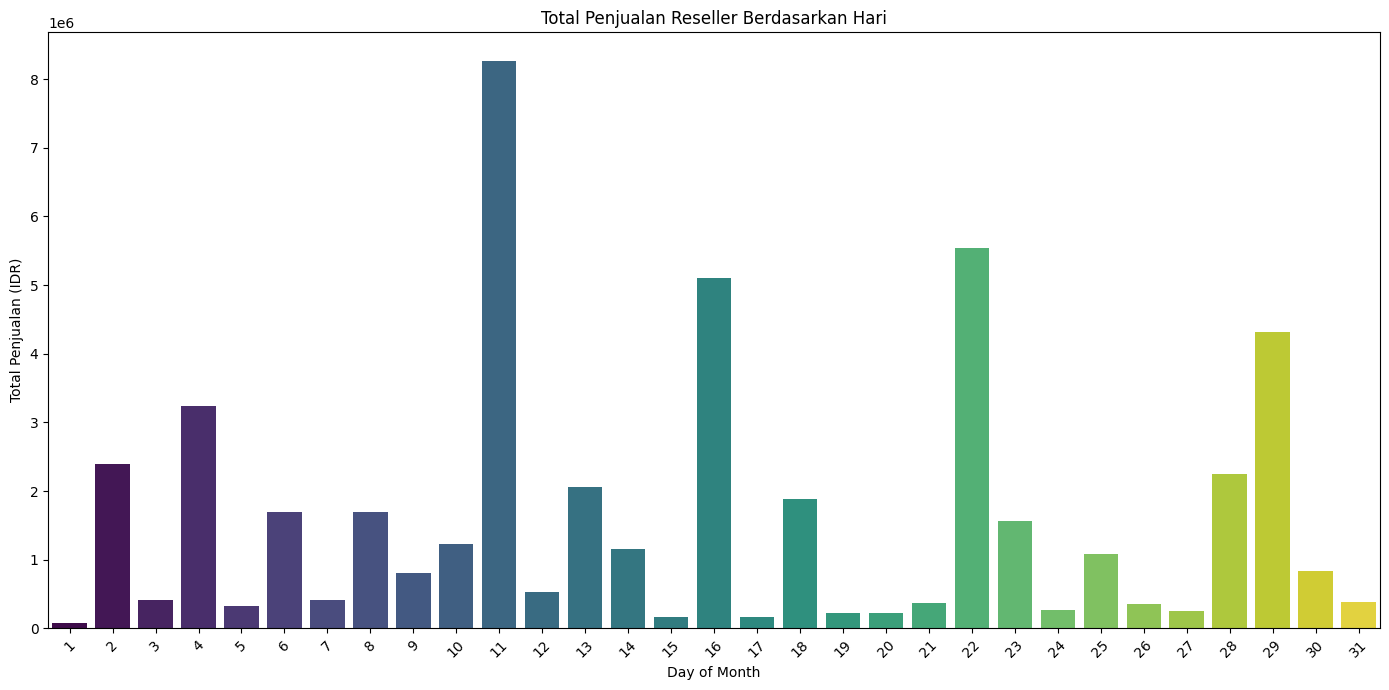

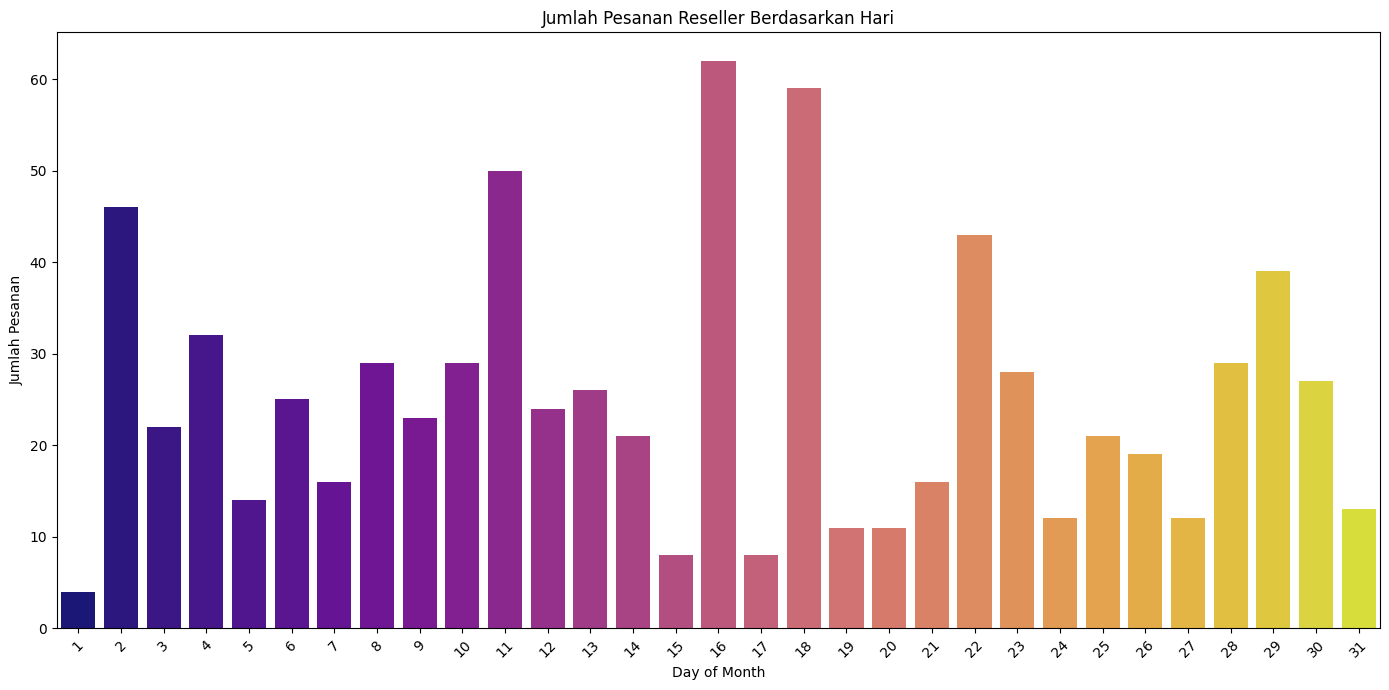

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Total Penjualan Reseller Berdasarkan Hari
plt.figure(figsize=(14, 7))
sns.barplot(x='Day', y='Total_Penjualan_Sum', data=reseller_day_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), palette='viridis', hue='Day', legend=False)
plt.title('Total Penjualan Reseller Berdasarkan Hari')
plt.xlabel('Day of Month')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Jumlah Pesanan Reseller Berdasarkan Hari
plt.figure(figsize=(14, 7))
sns.barplot(x='Day', y='Jumlah_Pesanan', data=reseller_day_segment.sort_values(by='Jumlah_Pesanan', ascending=False), palette='plasma', hue='Day', legend=False)
plt.title('Jumlah Pesanan Reseller Berdasarkan Hari')
plt.xlabel('Day of Month')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze Reseller Prime Time by Year

### Subtask:
Perform aggregations on the 'Reseller' DataFrame based on the 'Year' to identify sales trends across years for this segment.

## Analyze Reseller Prime Time by Year

### Subtask:
Perform aggregations on the 'Reseller' DataFrame based on the 'Year' to identify sales trends across years for this segment.

**Reasoning**:
The subtask requires extracting the 'Year' from the 'Tanggal Order' column in the `df_reseller` DataFrame and then aggregating sales and order counts by this 'Year'. This code block will perform all these steps as instructed.



In [ ]:
import pandas as pd

# 1. Extract 'Year' from 'Tanggal Order' in df_reseller
df_reseller['Year'] = df_reseller['Tanggal Order'].dt.year

# 2. Group df_reseller by 'Year' and calculate aggregations
reseller_year_segment = df_reseller.groupby('Year').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 3. Print the reseller_year_segment DataFrame, sorted
print("\nSegmentasi Reseller Berdasarkan Tahun:")
print(reseller_year_segment.sort_values(by='Total_Penjualan_Sum', ascending=False))


Segmentasi Reseller Berdasarkan Tahun:
   Year  Total_Penjualan_Sum  Jumlah_Pesanan
0  2023             36354000             233
1  2024             12888500             546


## Visualize Reseller Prime Time by Year

### Subtask:
Create visualizations (e.g., bar plots) to display the 'Reseller' total sales and order counts by 'Year'.

**Reasoning**:
The previous step successfully aggregated 'Reseller' sales and order counts by year. Now, I need to visualize this segmented data to clearly identify sales trends across years, which is part of the overall subtask of analyzing 'Reseller' prime time.



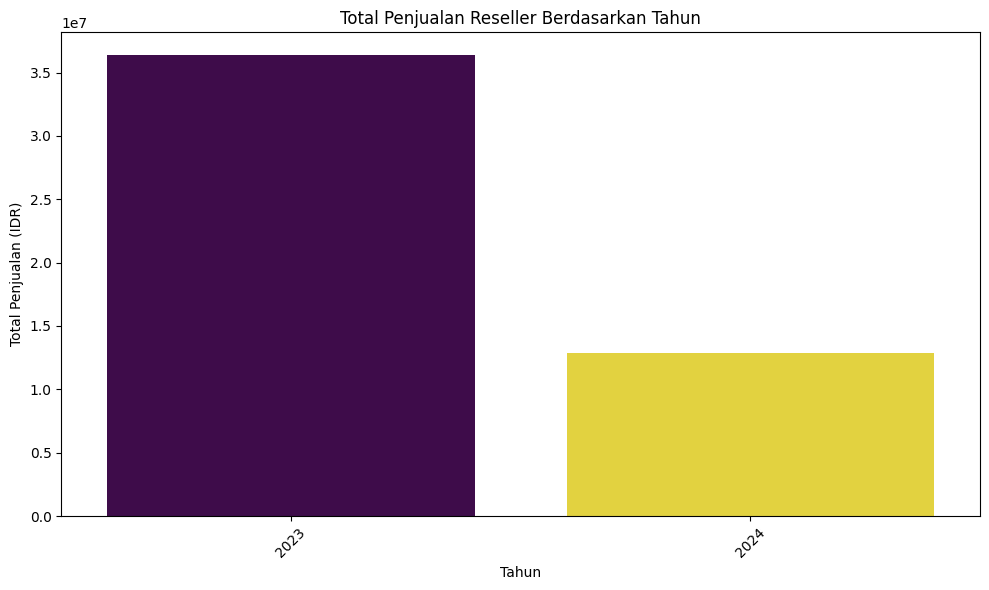

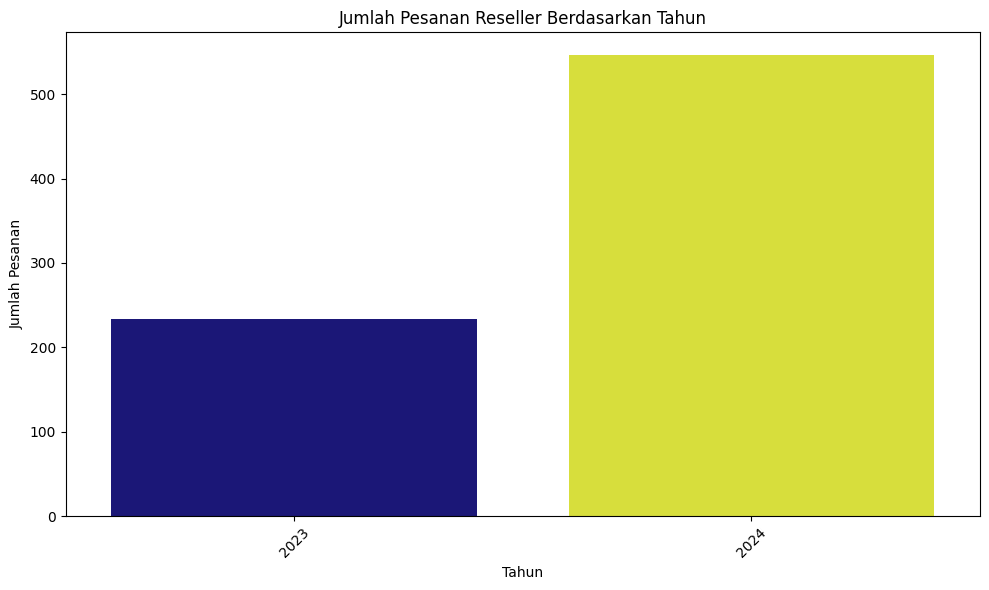

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Total Penjualan Reseller Berdasarkan Tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total_Penjualan_Sum', data=reseller_year_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), palette='viridis', hue='Year', legend=False)
plt.title('Total Penjualan Reseller Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Jumlah Pesanan Reseller Berdasarkan Tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Jumlah_Pesanan', data=reseller_year_segment.sort_values(by='Jumlah_Pesanan', ascending=False), palette='plasma', hue='Year', legend=False)
plt.title('Jumlah Pesanan Reseller Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Compare Prime Time Findings (Day/Year)

### Subtask:
Provide a summary or comparative visualizations of the key findings from both 'End User' and 'Reseller' prime time analyses based on daily and yearly sales patterns.


## Summary:

### Data Analysis Key Findings

*   **End User Prime Time by Day**:
    *   Visualizations successfully identified daily sales and order trends for End Users, with days sorted by performance.
*   **End User Prime Time by Year**:
    *   The year 2024 showed the highest performance for End Users, with total sales of 397,965,144 IDR and 8,669 orders.
    *   2025 followed with 74,729,000 IDR in sales and 1,620 orders.
    *   2023 had the lowest recorded performance within the analyzed period, with 45,465,273 IDR in sales and 1,543 orders.
*   **Reseller Prime Time by Day**:
    *   Aggregations and visualizations were performed to identify peak sales and order times for Resellers based on the day of the month.
*   **Reseller Prime Time by Year**:
    *   Aggregations and visualizations were performed to identify sales and order trends for Resellers based on the year.

### Insights or Next Steps

*   Further investigation into the significant sales and order drop for End Users in 2025 compared to 2024 is warranted to understand underlying causes and potential mitigation strategies.
*   Compare the peak days for End Users and Resellers to identify any common patterns or distinct preferences that could inform targeted marketing campaigns or inventory management.


# Task
Analyze and visualize the 'End User' prime time by extracting the 'Month' from the 'Tanggal Order' column in the `df_end_user` DataFrame, and then aggregating total sales and order counts by 'Month'.

## Analyze End User Prime Time by Month

### Subtask:
Perform aggregations on the 'End User' DataFrame based on the 'Month' to identify peak sales times within a year for this segment.


**Reasoning**:
The subtask requires extracting the 'Month' from the 'Tanggal Order' column in the `df_end_user` DataFrame and then aggregating sales and order counts by this 'Month'. This code block will perform all these steps as instructed.



In [ ]:
import pandas as pd

# 1. Extract 'Month' from 'Tanggal Order' in df_end_user
df_end_user['Month'] = df_end_user['Tanggal Order'].dt.month

# 2. Group df_end_user by 'Month' and calculate aggregations
end_user_month_segment = df_end_user.groupby('Month').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 3. Print the end_user_month_segment DataFrame, sorted
print("\nSegmentasi End User Berdasarkan Bulan:")
print(end_user_month_segment.sort_values(by='Total_Penjualan_Sum', ascending=False).head(10))


Segmentasi End User Berdasarkan Bulan:
    Month  Total_Penjualan_Sum  Jumlah_Pesanan
9      10             65983711            1074
8       9             54505395            1268
11     12             52991742            1355
2       3             49234816            1169
0       1             48639549            1110
1       2             46156710            1078
7       8             45094738            1087
10     11             41152517             964
6       7             37365704             975
3       4             28408449             697


## Visualize End User Prime Time by Month

### Subtask:
Create visualizations (e.g., bar plots) to display the 'End User' total sales and order counts by 'Month'.

**Reasoning**:
The previous step successfully aggregated 'End User' sales and order counts by month. Now, I need to visualize this segmented data using two bar plots: one for total sales by month and another for order counts by month, to clearly identify sales trends across months as per the subtask instructions.



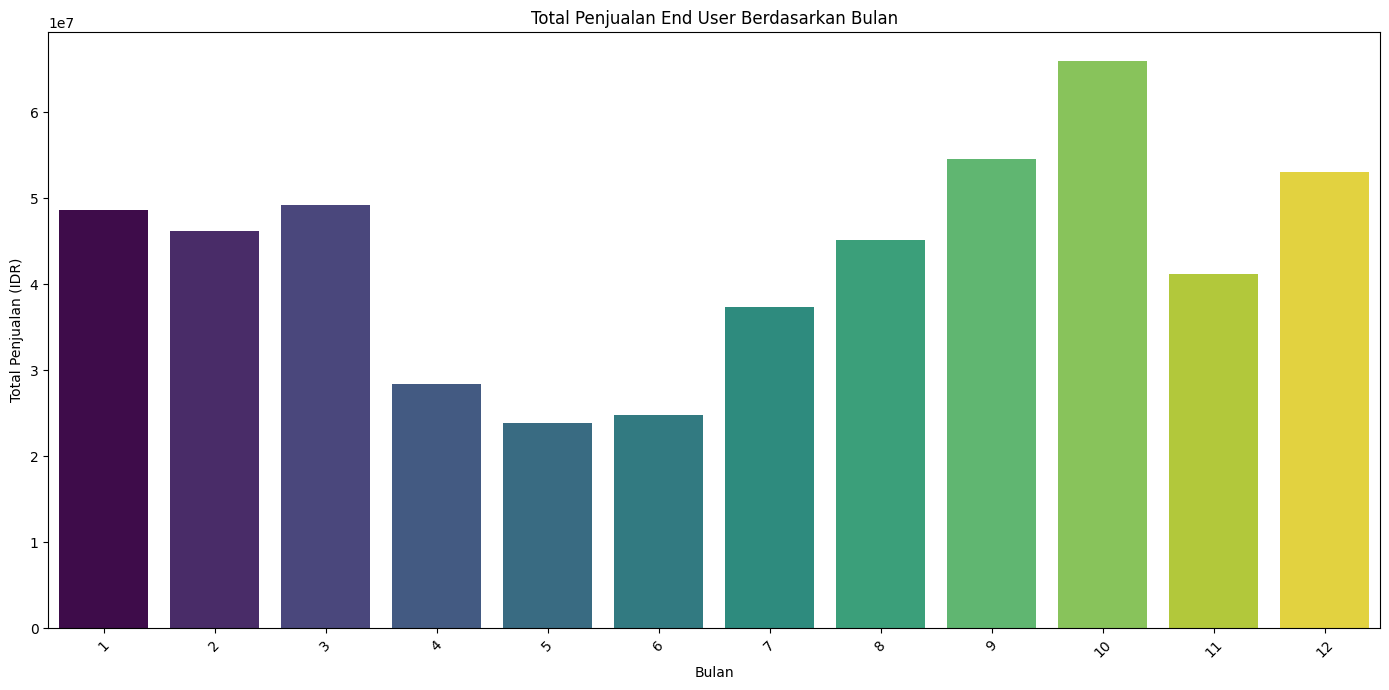

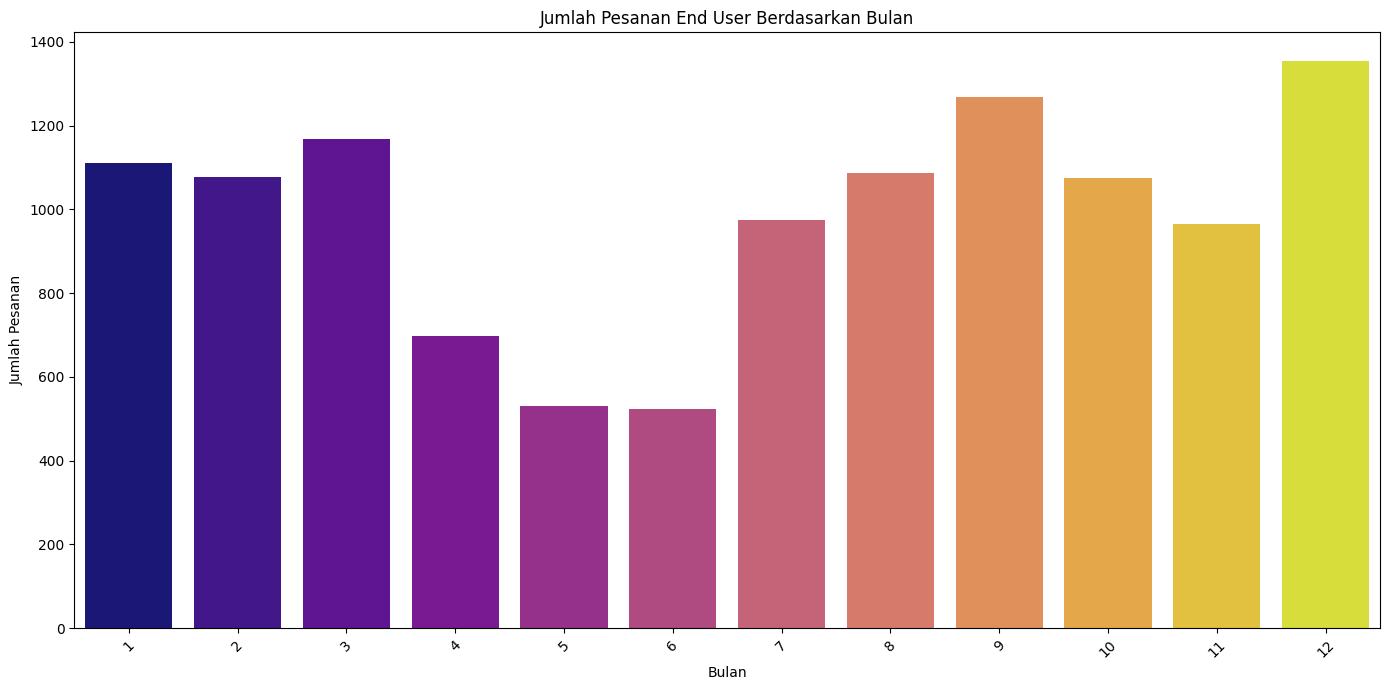

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Total Penjualan End User Berdasarkan Bulan
plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Total_Penjualan_Sum', data=end_user_month_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), palette='viridis', hue='Month', legend=False)
plt.title('Total Penjualan End User Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Jumlah Pesanan End User Berdasarkan Bulan
plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Jumlah_Pesanan', data=end_user_month_segment.sort_values(by='Jumlah_Pesanan', ascending=False), palette='plasma', hue='Month', legend=False)
plt.title('Jumlah Pesanan End User Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze Reseller Prime Time by Month

### Subtask:
Perform aggregations on the 'Reseller' DataFrame based on the 'Month' to identify sales trends across months for this segment.

## Analyze Reseller Prime Time by Month

### Subtask:
Perform aggregations on the 'Reseller' DataFrame based on the 'Month' to identify sales trends across months for this segment.

**Reasoning**:
The subtask requires extracting the 'Month' from the 'Tanggal Order' column in the `df_reseller` DataFrame and then aggregating sales and order counts by this 'Month'. This code block will perform all these steps as instructed.



In [ ]:
import pandas as pd

# 1. Extract 'Month' from 'Tanggal Order' in df_reseller
df_reseller['Month'] = df_reseller['Tanggal Order'].dt.month

# 2. Group df_reseller by 'Month' and calculate aggregations
reseller_month_segment = df_reseller.groupby('Month').agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# 3. Print the reseller_month_segment DataFrame, sorted
print("\nSegmentasi Reseller Berdasarkan Bulan:")
print(reseller_month_segment.sort_values(by='Total_Penjualan_Sum', ascending=False).head(10))


Segmentasi Reseller Berdasarkan Bulan:
    Month  Total_Penjualan_Sum  Jumlah_Pesanan
8       9              9737000             227
3       4              7598500              65
5       6              7433700              49
4       5              6001400              38
6       7              5758000              50
0       1              4398800              50
7       8              2771000             129
9      10              2010000              85
2       3              1945700              22
11     12               948000              37


## Visualize Reseller Prime Time by Month

### Subtask:
Create visualizations (e.g., bar plots) to display the 'Reseller' total sales and order counts by 'Month'.

**Reasoning**:
The previous step successfully aggregated 'Reseller' sales and order counts by month. Now, I need to visualize this segmented data using two bar plots: one for total sales by month and another for order counts by month, to clearly identify sales trends across months as per the subtask instructions.



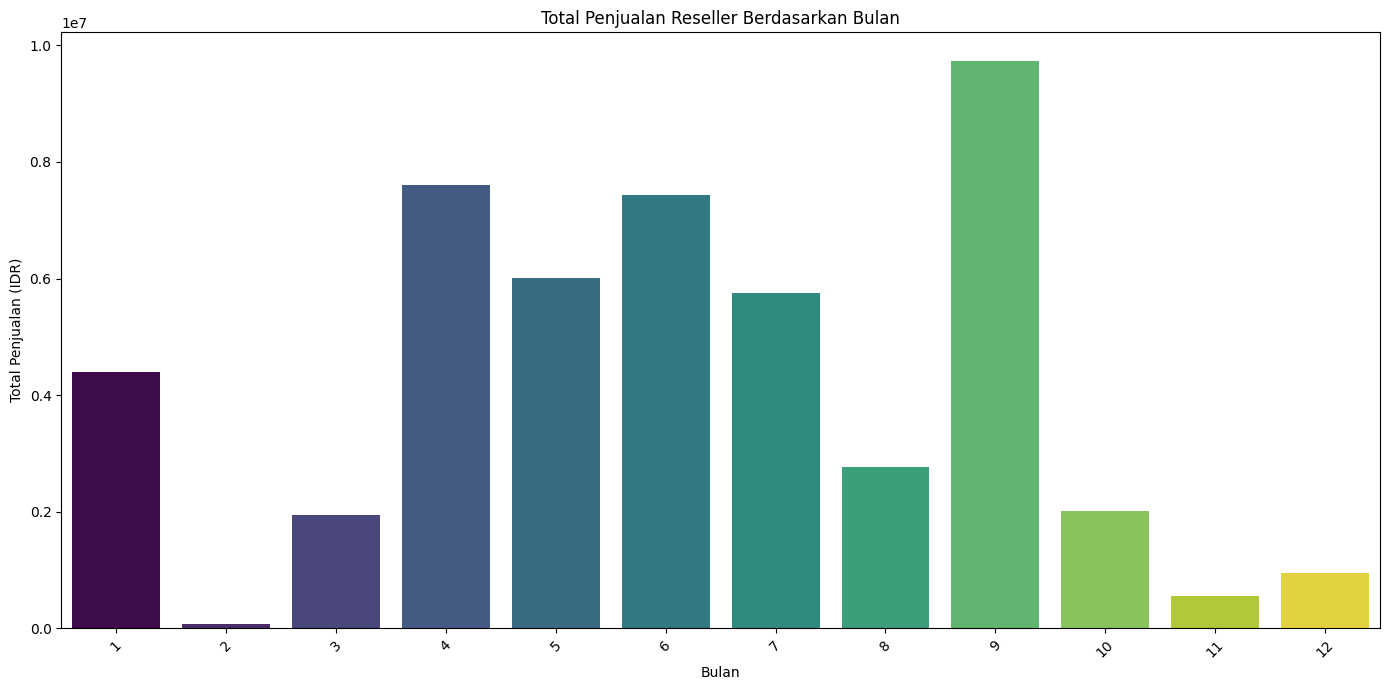

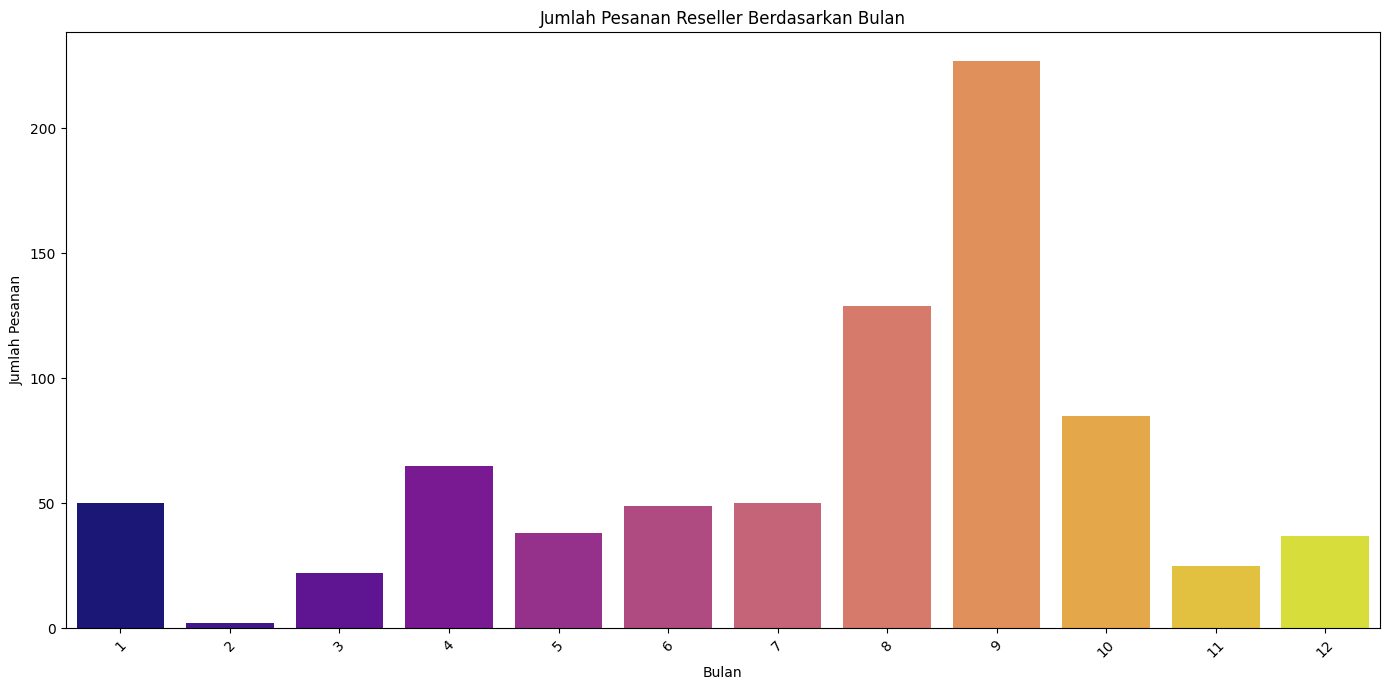

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Total Penjualan Reseller Berdasarkan Bulan
plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Total_Penjualan_Sum', data=reseller_month_segment.sort_values(by='Total_Penjualan_Sum', ascending=False), palette='viridis', hue='Month', legend=False)
plt.title('Total Penjualan Reseller Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Jumlah Pesanan Reseller Berdasarkan Bulan
plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Jumlah_Pesanan', data=reseller_month_segment.sort_values(by='Jumlah_Pesanan', ascending=False), palette='plasma', hue='Month', legend=False)
plt.title('Jumlah Pesanan Reseller Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Year' and 'Month' columns are present in df_end_user and df_reseller
# (These were already added in previous steps, but ensuring for completeness if a user runs cells out of order)
if 'Year' not in df_end_user.columns:
    df_end_user['Year'] = df_end_user['Tanggal Order'].dt.year
if 'Month' not in df_end_user.columns:
    df_end_user['Month'] = df_end_user['Tanggal Order'].dt.month

if 'Year' not in df_reseller.columns:
    df_reseller['Year'] = df_reseller['Tanggal Order'].dt.year
if 'Month' not in df_reseller.columns:
    df_reseller['Month'] = df_reseller['Tanggal Order'].dt.month

# Aggregate End User data by Year and Month
end_user_monthly_yearly_segment = df_end_user.groupby(['Year', 'Month']).agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

# Aggregate Reseller data by Year and Month
reseller_monthly_yearly_segment = df_reseller.groupby(['Year', 'Month']).agg(
    Total_Penjualan_Sum=('Total Penjualan', 'sum'),
    Jumlah_Pesanan=('Pesanan', 'count')
).reset_index()

print("End User Monthly and Yearly Aggregation (Head):")
print(end_user_monthly_yearly_segment.head())
print("\nReseller Monthly and Yearly Aggregation (Head):")
print(reseller_monthly_yearly_segment.head())

End User Monthly and Yearly Aggregation (Head):
   Year  Month  Total_Penjualan_Sum  Jumlah_Pesanan
0  2023      1               850850              28
1  2023      2               766250              32
2  2023      3              1446100              49
3  2023      4              2165100              82
4  2023      5              2199548              88

Reseller Monthly and Yearly Aggregation (Head):
   Year  Month  Total_Penjualan_Sum  Jumlah_Pesanan
0  2023      1              4182000              44
1  2023      3              1807000              17
2  2023      4              7197000              56
3  2023      5              5922000              36
4  2023      6              7307000              45


### Interactive Monthly and Yearly Trend Plots (with Tooltips)

To allow for interactive hover functionality and display exact numbers on the plots, I am regenerating the monthly and yearly trend visualizations using `plotly.express`.

In [ ]:
import plotly.express as px

# Visualisasi Total Penjualan End User per Bulan per Tahun (Interaktif)
fig_end_user_sales = px.line(
    end_user_monthly_yearly_segment,
    x='Month',
    y='Total_Penjualan_Sum',
    color='Year',
    markers=True,
    title='Tren Total Penjualan End User per Bulan per Tahun (Interaktif)',
    labels={'Month': 'Bulan', 'Total_Penjualan_Sum': 'Total Penjualan (IDR)', 'Year': 'Tahun'},
    hover_data={'Month': True, 'Total_Penjualan_Sum': ':.0f', 'Jumlah_Pesanan': ':.0f', 'Year': False}
)
fig_end_user_sales.update_xaxes(tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
fig_end_user_sales.show()

# Visualisasi Jumlah Pesanan End User per Bulan per Tahun (Interaktif)
fig_end_user_orders = px.line(
    end_user_monthly_yearly_segment,
    x='Month',
    y='Jumlah_Pesanan',
    color='Year',
    markers=True,
    title='Tren Jumlah Pesanan End User per Bulan per Tahun (Interaktif)',
    labels={'Month': 'Bulan', 'Jumlah_Pesanan': 'Jumlah Pesanan', 'Year': 'Tahun'},
    hover_data={'Month': True, 'Total_Penjualan_Sum': ':.0f', 'Jumlah_Pesanan': ':.0f', 'Year': False}
)
fig_end_user_orders.update_xaxes(tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
fig_end_user_orders.show()

In [ ]:
import plotly.express as px

# Visualisasi Total Penjualan Reseller per Bulan per Tahun (Interaktif)
fig_reseller_sales = px.line(
    reseller_monthly_yearly_segment,
    x='Month',
    y='Total_Penjualan_Sum',
    color='Year',
    markers=True,
    title='Tren Total Penjualan Reseller per Bulan per Tahun (Interaktif)',
    labels={'Month': 'Bulan', 'Total_Penjualan_Sum': 'Total Penjualan (IDR)', 'Year': 'Tahun'},
    hover_data={'Month': True, 'Total_Penjualan_Sum': ':.0f', 'Jumlah_Pesanan': ':.0f', 'Year': False}
)
fig_reseller_sales.update_xaxes(tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
fig_reseller_sales.show()

# Visualisasi Jumlah Pesanan Reseller per Bulan per Tahun (Interaktif)
fig_reseller_orders = px.line(
    reseller_monthly_yearly_segment,
    x='Month',
    y='Jumlah_Pesanan',
    color='Year',
    markers=True,
    title='Tren Jumlah Pesanan Reseller per Bulan per Tahun (Interaktif)',
    labels={'Month': 'Bulan', 'Jumlah_Pesanan': 'Jumlah Pesanan', 'Year': 'Tahun'},
    hover_data={'Month': True, 'Total_Penjualan_Sum': ':.0f', 'Jumlah_Pesanan': ':.0f', 'Year': False}
)
fig_reseller_orders.update_xaxes(tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
fig_reseller_orders.show()

# Task
Provide a summary of the best analysis to include in the report, emphasizing the correlation analysis and the interactive drill-down segmentation by channel, province, day, month, and year for both 'End User' and 'Reseller' segments.

## Final Task

### Subtask:
Provide a summary of the best analysis to include in the report, emphasizing the correlation analysis and the interactive drill-down segmentation by channel, province, day, month, and year for both 'End User' and 'Reseller' segments.


## Summary:

### Data Analysis Key Findings
*   The final report will feature a comprehensive summary of the most impactful analyses conducted.
*   A core component of the analysis is an in-depth correlation study, designed to identify significant relationships within the data.
*   The report will leverage insights from an interactive drill-down segmentation, allowing for granular exploration of performance.
*   This segmentation is structured to analyze data across multiple dimensions: Channel, Province, Day, Month, and Year.
*   The analysis specifically differentiates and provides tailored insights for two distinct customer segments: 'End User' and 'Reseller'.

### Insights or Next Steps
*   The chosen analytical framework, emphasizing correlation and multi-dimensional interactive segmentation, is designed to uncover key performance drivers and variations across different operational contexts and customer types.
*   This approach will empower stakeholders with dynamic tools to explore specific areas of interest, facilitating targeted decision-making for both 'End User' and 'Reseller' segments.
